# WeatherPy
----

### Analysis
* The temperature of cities located North of the equator experience lower temperatures compared to cities located South of the equator. In addition, the futher away North the city is from the equator, the lower the temperature is. 
* Based on this information, there appears to be no correlation with the city's cloudiness factor and its' latitude. There also appears to be no correlation with the wind speed a city expereinces and the latitude of the city. 
* There appears to be no correlation with a city's humidity and its' latitude. However, most cities appear to experience 50% or more humidity.

---


In [8]:
#dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow
import json

#import API key
from api_keys import api_key

#incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#output file (CSV)
output_data_file = "output_data/cities.csv"

#range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
#list for holding lat_lngs and cities
lat_lngs = []
cities = []

#create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #if the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls

In [17]:
#create an empty list
city_weather = []

#create a counter and set it to 0 to number each city 
counter = 0

#base url
url = "http://api.openweathermap.org/data/2.5/weather?"

#create print statements before retrieving city name
print("Beginning Data Retrieval")
print("---------------------------------")

#create a for statement
for city in cities:
    
    #set parameters to create a specific url
    params = {"appid": api_key,
              "units": "imperial",
              "q": city
             }
    
    #create exact url with parameters and get it in JSON format
    city_response = requests.get(url, params=params)
    city_json = city_response.json()
    
    #use this statement to view in pretty print JSON format
    #commented out after extracting information in the try & except section:
    
    #print(json.dumps(city_json, indent=4, sort_keys=True))  
    
    #create a timer so the api key does not get locked out. Stop the code for 1 second in between
    time.sleep(1)

    #set counter to +1 to increase the number by 1 for each city
    counter += 1
    
    #create a print statement of each city as it is being processed
    print(f"Processing record {counter}|{city}")
    
    #create a try and except to skip through errors
    try:
        city_name = city_json["name"]
        city_clouds = city_json["clouds"]["all"]
        city_country = city_json["sys"]["country"]
        city_date = city_json["dt"]
        city_humidity = city_json["main"]["humidity"]
        city_latitude = city_json["coord"]["lat"]
        city_longitude = city_json["coord"]["lon"]
        city_max_temp = city_json["main"]["temp_max"]
        city_wind_speed = city_json["wind"]["speed"]
        
        #create a list of dictionaries and append weather data for each city into empty city_weather list 
        city_weather.append({"City": city_name,
                            "Cloudiness": city_clouds, 
                            "Country": city_country,
                            "Date": city_date,
                            "Humidity": city_humidity,
                            "Lat": city_latitude,
                            "Lng": city_longitude,
                            "Max Temp": city_max_temp,
                            "Wind Speed": city_wind_speed
                            })  
    
    except (KeyError, IndexError):
        print("City not found. Skipping...")

#create print statememnt after retrieving all city names 
print("---------------------------------")
print("Data Retrieval Complete")
print("---------------------------------")

Beginning Data Retrieval
---------------------------------
Processing record 1|richards bay
Processing record 2|phalodi
Processing record 3|walvis bay
Processing record 4|sur
Processing record 5|hermanus
Processing record 6|bluff
Processing record 7|avarua
Processing record 8|rikitea
Processing record 9|zanjan
Processing record 10|tautira
Processing record 11|pevek
Processing record 12|port alfred
Processing record 13|baruun-urt
Processing record 14|verkhnevilyuysk
Processing record 15|chokurdakh
Processing record 16|jamestown
Processing record 17|mar del plata
Processing record 18|kharp
Processing record 19|lagoa
Processing record 20|mangochi
Processing record 21|hobart
Processing record 22|busselton
Processing record 23|whitehorse
Processing record 24|rio grande
Processing record 25|barentsburg
City not found. Skipping...
Processing record 26|bredasdorp
Processing record 27|masterton
Processing record 28|kerteh
City not found. Skipping...
Processing record 29|taolanaro
City not found

Processing record 249|madimba
Processing record 250|clyde river
Processing record 251|roebourne
Processing record 252|elkhart
Processing record 253|el mahalla el kubra
City not found. Skipping...
Processing record 254|pangnirtung
Processing record 255|palabuhanratu
City not found. Skipping...
Processing record 256|linxia
Processing record 257|caravelas
Processing record 258|srivardhan
Processing record 259|faya
Processing record 260|conde
Processing record 261|dinard
Processing record 262|gornopravdinsk
Processing record 263|ponta do sol
Processing record 264|shymkent
Processing record 265|masvingo
Processing record 266|saint-georges
Processing record 267|bethanien
Processing record 268|fairbanks
Processing record 269|toliary
City not found. Skipping...
Processing record 270|sentyabrskiy
City not found. Skipping...
Processing record 271|ojinaga
Processing record 272|svetlaya
Processing record 273|sao jose dos campos
Processing record 274|tomatlan
Processing record 275|boguchany
Process

Processing record 480|banda aceh
Processing record 481|capela
Processing record 482|chicama
Processing record 483|kahama
Processing record 484|manavalakurichi
Processing record 485|koutiala
Processing record 486|maragogi
Processing record 487|dongying
Processing record 488|bonthe
Processing record 489|sault sainte marie
Processing record 490|washington
Processing record 491|sorkjosen
City not found. Skipping...
Processing record 492|fez
Processing record 493|bonavista
Processing record 494|marinette
Processing record 495|portree
Processing record 496|blagoyevo
Processing record 497|harper
Processing record 498|necochea
Processing record 499|peleduy
Processing record 500|safranbolu
Processing record 501|mananjary
Processing record 502|merrill
Processing record 503|urumqi
City not found. Skipping...
Processing record 504|camacha
Processing record 505|abu zabad
Processing record 506|livenka
Processing record 507|tambo
Processing record 508|egvekinot
Processing record 509|goderich
Processi

In [18]:
#create dataframe and count the number of cities in dataset
city_weather_df = pd.DataFrame(city_weather)

city_weather_df.count()

City          541
Cloudiness    541
Country       541
Date          541
Humidity      541
Lat           541
Lng           541
Max Temp      541
Wind Speed    541
dtype: int64

In [19]:
#show dataframe from the raw information from the API 

city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Richards Bay,92,ZA,1553640508,90,-28.77,32.06,68.13,4.32
1,Phalodi,0,IN,1553640509,55,27.13,72.36,63.18,2.75
2,Walvis Bay,0,NA,1553637731,82,-22.95,14.51,61.00,5.82
3,Sur,12,OM,1553640511,88,22.57,59.53,74.56,7.23
4,Hermanus,88,ZA,1553639450,77,-34.42,19.24,68.00,8.01


#### Latitude vs. Temperature Plot

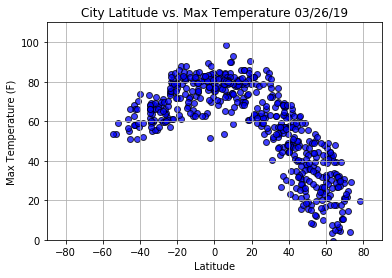

In [20]:
#create a latitude vs. temperature scatter plot

#x-axis
x_axis = city_weather_df["Lat"]

#y-axis
y_axis = city_weather_df["Max Temp"]

#create scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)

#set x-limit
plt.xlim (-90,90)

#set y-limit
plt.ylim(0, 110)

#set a grid
plt.grid()

#label the plot
plt.title("City Latitude vs. Max Temperature 03/26/19")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#save figure
plt.savefig("Images/latVStemp.png")

#### Latitude vs. Humidity Plot

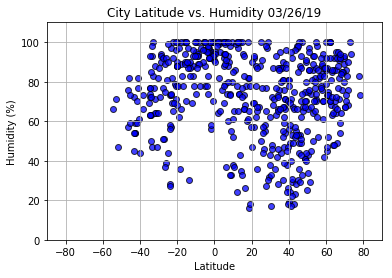

In [21]:
#create a latitude vs. humidity scatter plot

#x-axis
x_axis = city_weather_df["Lat"]

#y-axis
y_axis = city_weather_df["Humidity"]

#create scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)

#set x-limit
plt.xlim (-90,90)

#set y-limit
plt.ylim(0, 110)

#set a grid
plt.grid()

#label the plot
plt.title("City Latitude vs. Humidity 03/26/19")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#save figure
plt.savefig("Images/latVShumidity.png")

#### Latitude vs. Cloudiness Plot

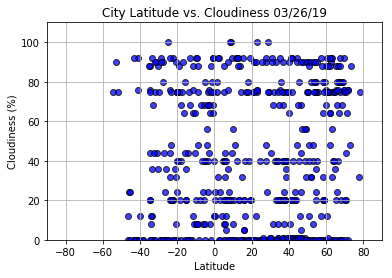

In [22]:
#create a latitude vs. cloudiness scatter plot

#x-axis
x_axis = city_weather_df["Lat"]

#y-axis
y_axis = city_weather_df["Cloudiness"]

#create scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)

#set x-limit
plt.xlim (-90,90)

#set y-limit
plt.ylim(0, 110)

#set a grid
plt.grid()

#label the plot
plt.title("City Latitude vs. Cloudiness 03/26/19")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#save figure
plt.savefig("Images/latVScloudiness.png")

#### Latitude vs. Wind Speed Plot

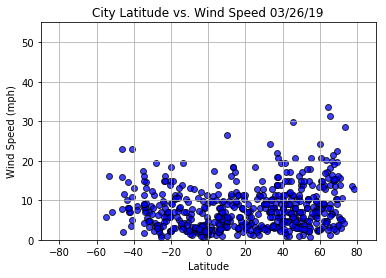

In [23]:
#create a latitude vs. wind speed scatter plot

#x-axis
x_axis = city_weather_df["Lat"]

#y-axis
y_axis = city_weather_df["Wind Speed"]

#create scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)

#set x-limit
plt.xlim (-90,90)

#set y-limit
plt.ylim(0, 55)

#set a grid
plt.grid()

#label the plot
plt.title("City Latitude vs. Wind Speed 03/26/19")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#save figure
plt.savefig("Images/latVSwindspeed.png")